#  Վարկերի վճարման / չվճարման  կլասիֆիկացիա

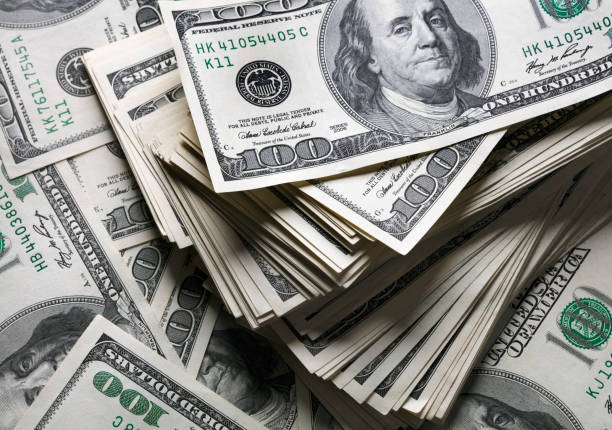

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Անհարաժեշտ գրադարանների ներմուծում, տվյալների բազայի բեռնում

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn  import preprocessing
%matplotlib inline
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [ ]:
df = pd.read_csv(open('loan_train.csv','rb'))
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# Տվյալների վերլուծություն

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [ ]:
df['due_date'] = pd.to_datetime (df['due_date'])
df['effective_date'] = pd.to_datetime (df ['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
PAIDOFF,260
COLLECTION,86


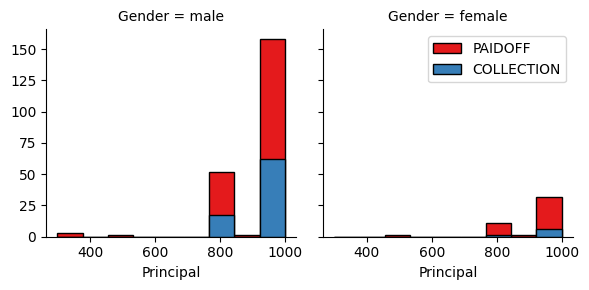

In [ ]:
import seaborn as sns
bins = np.linspace (df.Principal.min(), df. Principal.max(), 10)
g = sns.FacetGrid (df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins = bins, ec="k")
g.axes[-1].legend()
plt.show()

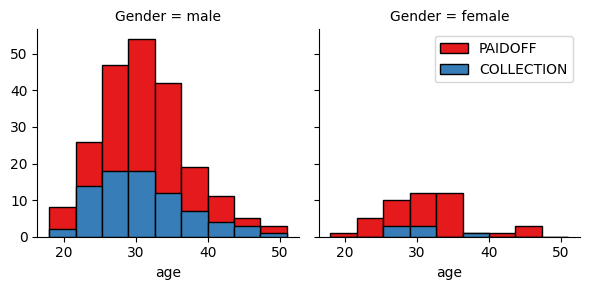

In [ ]:
bins= np.linspace(df.age.min(), df.age.max(), 10)
g= sns.FacetGrid (df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins = bins, ec="k")
g.axes[-1].legend()
plt.show()

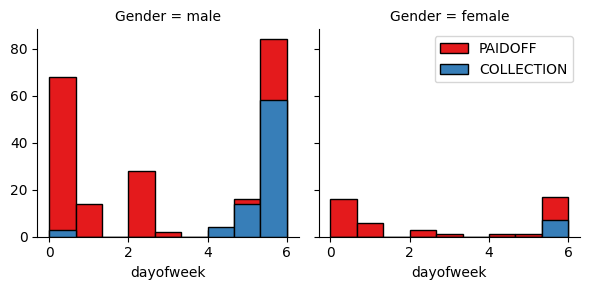

In [ ]:
df['dayofweek']=df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid (df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# Կատեգորիկ հատկանիշները փոխենք թվային արժեքների

In [ ]:
df.groupby(['Gender']) ['loan_status'].value_counts (normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: proportion, dtype: float64

In [ ]:
df['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
df.head()

<ipython-input-14-6ef8d65836e1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
<ipython-input-14-6ef8d65836e1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace(to_replace=['male', 'female'], value=[

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# One Hot Encoding

In [ ]:
df.groupby(['education']) ['loan_status'].value_counts (normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: proportion, dtype: float64

In [ ]:
Feature = df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
Feature = pd.concat([Feature, pd.get_dummies (df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,False,True,False
1,1000,30,33,1,0,True,False,False
2,1000,15,27,0,0,False,False,True
3,1000,30,28,1,1,False,False,True
4,1000,30,29,0,1,False,False,True


In [ ]:
x = Feature
x[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,False,True,False
1,1000,30,33,1,0,True,False,False
2,1000,15,27,0,0,False,False,True
3,1000,30,28,1,1,False,False,True
4,1000,30,29,0,1,False,False,True


In [ ]:
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Նորմալիզացում

In [ ]:
x= preprocessing. StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K Nearest Neighbor(KNN)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
print('X_train size', x_train.shape)
print('Y_train size',y_train.shape)
print('X test', x_test.shape)
print('y_test',y_test.shape)

X_train size (276, 8)
Y_train size (276,)
X test (70, 8)
y_test (70,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
k = 20
metric_array = np.zeros((k-1))

for n in range(1,k):
  print(n)
  model = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
  y_hat = model.predict(x_test)
  metric_array[n-1] = metrics.accuracy_score(y_test,y_hat)
print(metric_array)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.64285714 0.58571429 0.74285714 0.7        0.74285714 0.71428571
 0.8        0.75714286 0.74285714 0.68571429 0.71428571 0.71428571
 0.68571429 0.7        0.68571429 0.72857143 0.71428571 0.71428571
 0.71428571]


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(x_train,y_train)
y_hat = model_dt.predict(x_test)
metric_dt = metrics.accuracy_score(y_test, y_hat)
print(metric_dt)

0.6142857142857143


# Logistic Regression

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_hat = clf.predict(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression (C=0.01, solver='liblinear').fit(x_train, (y_train))
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
y_hat_ = LR.predict(x_test)
y_hat_

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
test_df = pd.read_csv('loan_train.csv')
test_df.head()
test_df.shape

test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
Feature = test_df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
Feature = pd.concat([Feature, pd.get_dummies (test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head()

Feature['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
Feature.head()

<ipython-input-30-3c414b3cf42d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Feature['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
<ipython-input-30-3c414b3cf42d>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Feature['Gender'].replace(to_replace=['male', 'female'

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,False,True,False
1,1000,30,33,1,0,True,False,False
2,1000,15,27,0,0,False,False,True
3,1000,30,28,1,1,False,False,True
4,1000,30,29,0,1,False,False,True


In [ ]:
f = Feature
y_test_set = test_df ['loan_status'].values
x_test_set = preprocessing.StandardScaler().fit(f).transform(f)
print(x_test_set.shape)
print(y_test_set.shape)

(346, 8)
(346,)


In [ ]:
y_hat_knn = model.predict(x_test_set)
f1_score_knn = f1_score(y_test_set, y_hat_knn, pos_label="PAIDOFF")
print(f1_score_knn)

0.8432432432432433


In [ ]:
y_hat_dt = model.predict(x_test_set)
f1_score_dt = f1_score (y_test_set, y_hat_dt, pos_label="PAIDOFF")
print(f1_score_dt)

In [ ]:
y_hat_svm = clf.predict(x_test_set)
j_score_svm = jaccard_score(y_test_set, y_hat_svm, pos_label="PAIDOFF")

f1_score_svm = f1_score(y_test_set, y_hat_svm, pos_label="PAIDOFF")
print(j_score_svm)
print(f1_score_svm)

0.75
0.8571428571428571


In [ ]:
y_hat_lr = LR.predict(x_test_set)

y_hat_lr_prob = LR.predict_proba(x_test_set)

j_score_lr = jaccard_score(y_test_set, y_hat_lr, pos_label='PAIDOFF')
f1_score_lr = f1_score(y_test_set,y_hat_lr, pos_label='PAIDOFF')

log_loss_lr = log_loss((y_test_set), (y_hat_lr_prob))
print(j_score_lr)
print(f1_score_lr)
print(log_loss_lr)

0.7227414330218068
0.8390596745027125
0.5566227848707033


In [ ]:
report = { 'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], 'Jaccard':
           [j_score_knn,j_score_dt,j_score_svm,j_score_lr]
           ,'F1-Score': [f1_score_knn, f1_score_dt, f1_score_svm, f1_score_lr], 'LogLoss': ['NA', 'NA', 'NA', log_loss_lr]}
report_df = pd.DataFrame(report)

In [ ]:
print(report_df)

NameError: name 'report_df' is not defined